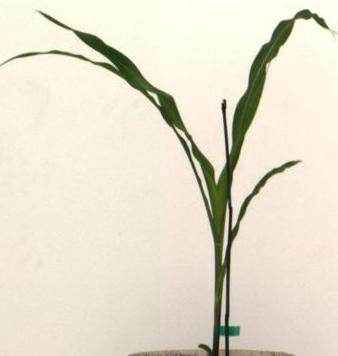

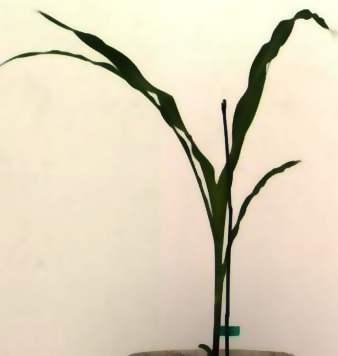

In [ ]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def mejorar_calidad_imagen(imagen):
    # Aplicar filtrado bilateral para reducir el ruido
    filtrada = cv2.bilateralFilter(imagen, 9, 75, 75)

    # Aplicar corrección gamma para ajustar la iluminación
    gamma = 1.5
    corregida = cv2.pow(filtrada / 255.0, gamma) * 255.0
    corregida = corregida.astype('uint8')

    return corregida


# Cargar la imagen de entrada
imagen = cv2.imread('/content/sample_data/81-001-Mo45_2018-08-20_05-04-26_Vis_SV_0.Crp - copia.jpg')  # Leer la imagen en escala de grises

# Mejorar la calidad de la imagen
imagen_mejorada = mejorar_calidad_imagen(imagen)


# Mostrar la imagen original, la imagen mejorada y la imagen segmentada
cv2_imshow(imagen)
cv2_imshow(imagen_mejorada)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def segmentar_planta_maiz(imagen):
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Aplicar un umbral para obtener una imagen binaria
    _, umbral = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Aplicar operaciones morfológicas para mejorar la segmentación
    kernel = np.ones((3, 3), np.uint8)
    erosion = cv2.erode(umbral, kernel, iterations=2)
    apertura = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel, iterations=3)
    cierre = cv2.morphologyEx(apertura, cv2.MORPH_CLOSE, kernel, iterations=3)

    # Encontrar contornos de la planta de maíz
    contornos, _ = cv2.findContours(cierre, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear una máscara en blanco para dibujar los contornos
    mascara = np.zeros(imagen.shape[:2], dtype=np.uint8)

    # Dibujar los contornos en la máscara
    cv2.drawContours(mascara, contornos, -1, (255), thickness=cv2.FILLED)

    # Aplicar la máscara a la imagen original
    planta_maiz_segmentada = cv2.bitwise_and(imagen, imagen, mask=mascara)

    return planta_maiz_segmentada

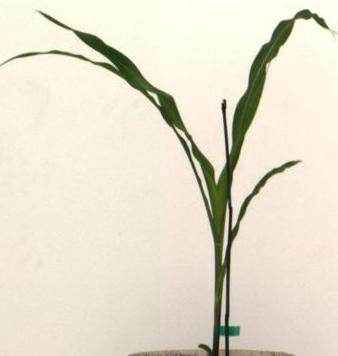

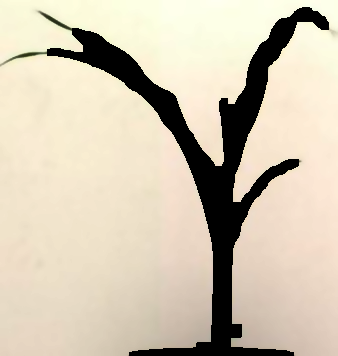

In [ ]:
planta_maiz_segmentada = segmentar_planta_maiz(imagen_mejorada)

# Mostrar la imagen original y la imagen segmentada
cv2_imshow(imagen)
cv2_imshow(planta_maiz_segmentada)
cv2.waitKey(0)
cv2.destroyAllWindows()